In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import ttest_ind
from sklearn import preprocessing, model_selection, linear_model, svm, tree, neural_network, metrics

data = pd.read_csv("/Users/aryasalian/MyProjects-github/JPM Quantitative Research Course Projects/Task 3/Task 3 and 4_Loan_Data.csv")
data.head() # 0 = did not default   1 = did default

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


First, we will do some preliminary analysis of the data to see if our dependent variable "default" has any relation to our independent variables which we are unaware of. For this, we will plot a boxplot to see how the default status depends on the independent variables.

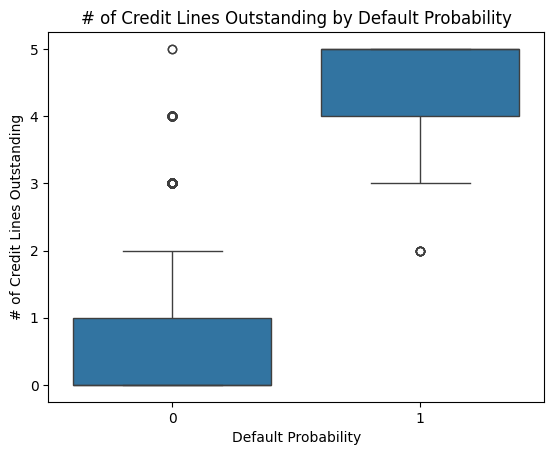

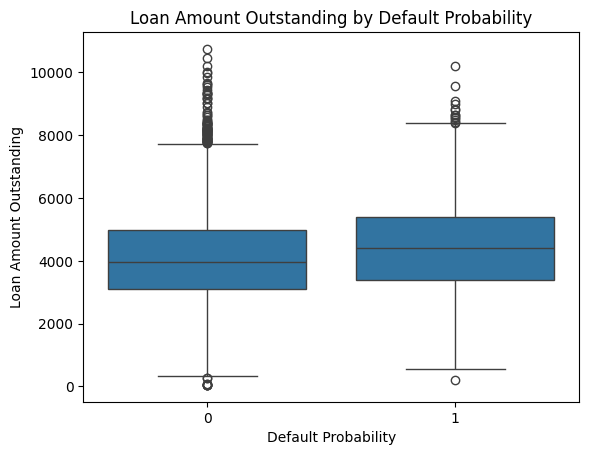

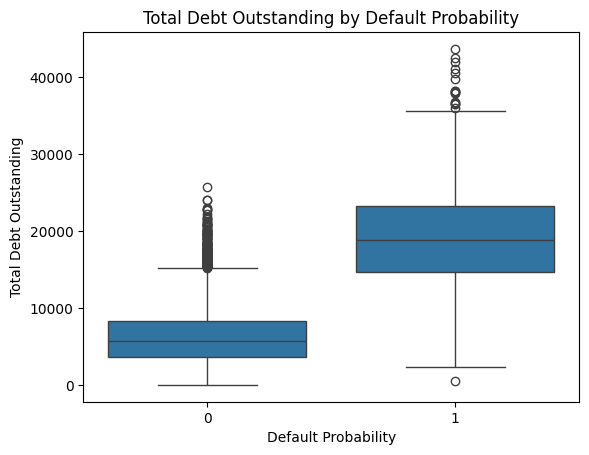

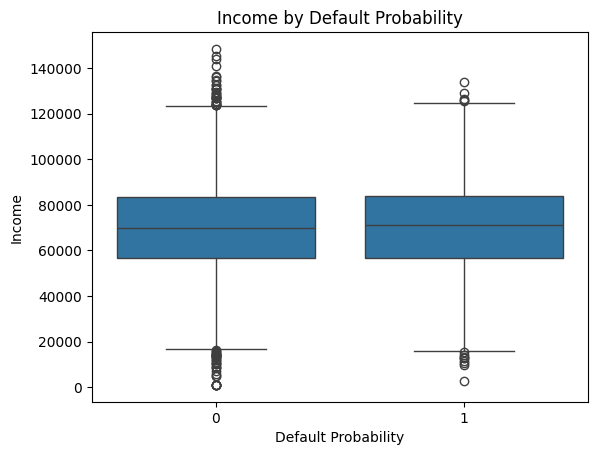

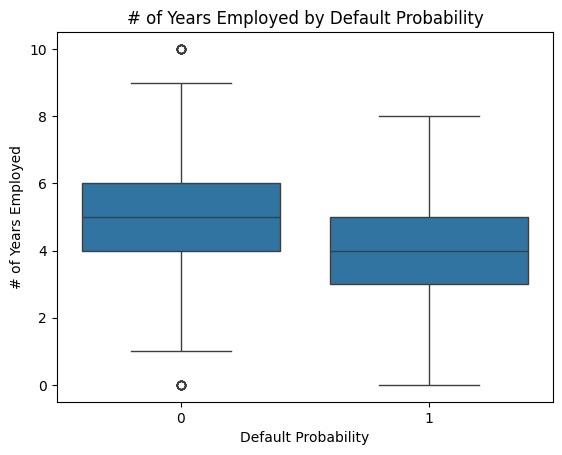

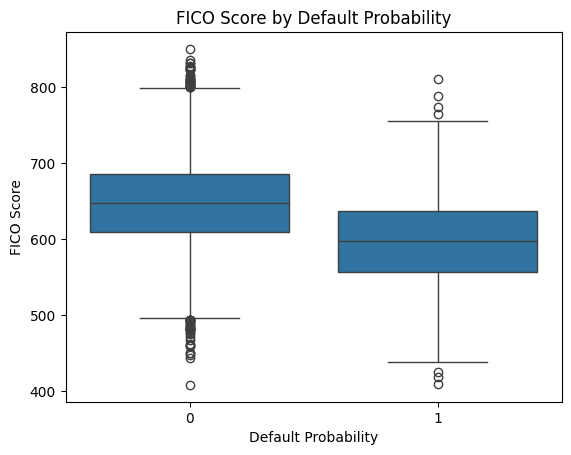

In [3]:
# Number of Credit Lines Outstanding
sb.boxplot(x='default', y='credit_lines_outstanding', data=data)
plt.xlabel('Default Probability')
plt.ylabel('# of Credit Lines Outstanding')
plt.title('# of Credit Lines Outstanding by Default Probability')
plt.show()

# Loan Amount Outstanding
sb.boxplot(x='default', y='loan_amt_outstanding', data=data)
plt.xlabel('Default Probability')
plt.ylabel('Loan Amount Outstanding')
plt.title('Loan Amount Outstanding by Default Probability')
plt.show()

# Total Debt Outstanding
sb.boxplot(x='default', y='total_debt_outstanding', data=data)
plt.xlabel('Default Probability')
plt.ylabel('Total Debt Outstanding')
plt.title('Total Debt Outstanding by Default Probability')
plt.show()

# Income
sb.boxplot(x='default', y='income', data=data)
plt.xlabel('Default Probability')
plt.ylabel('Income')
plt.title('Income by Default Probability')
plt.show()

# Number of Years Employed
sb.boxplot(x='default', y='years_employed', data=data)
plt.xlabel('Default Probability')
plt.ylabel('# of Years Employed')
plt.title('# of Years Employed by Default Probability')
plt.show()

# FICO Score
sb.boxplot(x='default', y='fico_score', data=data)
plt.xlabel('Default Probability')
plt.ylabel('FICO Score')
plt.title('FICO Score by Default Probability')
plt.show()

From the above box plots, we can make the following guesses on whether the default probability is dependent on the given factor or not: (For reference, outliers are shown by unfilled circles on the box plots)

1. **# of Credit Lines Outstanding:** The entire box plot for default_status = 0 ranges from values 0 to 2 and the entire box plot for default_status = 1 ranges from values 5 to 3 with outliers beyond said ranges for either plots. This suggests a strong direct relationship between the factor and default probability.

2. **Loan Amount Outstanding:** Both the box plots have approximately the same range and IQR(Inter-Quartile Range) but the median, upper-quartile and lower-quartile of the plot for default_status = 1 is slightly higher. The amount of overlap between the y-values of both plots and the IQRs makes it highly unlikely for this factor to have any relation with the default probability.

3. **Total Debt Outstanding:** The median, upper-quartile, lower-quartile and upper-whisker of the box plot for default_status = 0 is pretty low in comparison to the median, upper-quartile, lower-quartile and upper-whisker of the box plot for default_status = 1. This suggests a direct relationship between the factor and the default probability.

4. **Income:** Both box plots look like an exact copy of the other, except for the outliers. The IQR, whiskers, median, Q1 and Q3 are all identical by a negligible difference. This strongly suggests the absence of any relation between the factor and the default probability.

5. **# of Years Employed:** There seems to be a weak inverse relation between the factor and default probability but it is not completely discernable. Further statistical tests like a t-test might be required to confirm whether the relation is significant or not.

6. **FICO Score:** There again seems to be a weak inverse relation between the factor and default probability but it is not completely discernable. Further statistical tests like a t-test might be required to confirm whether the relation is significant or not.

Next, to ensure our analysis is correct and to be surer about our conclusions about the relationships between the variables, we will conduct a t-test for all variables.

In [4]:

def default_variable_dependency(variable_name: str):
    defaulters = data[data['default'] == 1][variable_name]
    non_defaulters = data[data['default'] == 0][variable_name]
    t_stat, p_value = ttest_ind(defaulters, non_defaulters)
    print('T-test results for '+variable_name+':')
    print('T-statistic:', t_stat)
    print('P-value:', p_value)
    if p_value < 0.05 and abs(t_stat) > 25:
        print('The relation between ' + variable_name + ' and default probability is significant')
    else:
        print('The relation between factor and default probability is insignificant')
    print('\n')

default_variable_dependency('credit_lines_outstanding')
default_variable_dependency('loan_amt_outstanding')
default_variable_dependency('total_debt_outstanding')
default_variable_dependency('income')
default_variable_dependency('years_employed')
default_variable_dependency('fico_score')



T-test results for credit_lines_outstanding:
T-statistic: 170.66189966992027
P-value: 0.0
The relation between credit_lines_outstanding and default probability is significant


T-test results for loan_amt_outstanding:
T-statistic: 9.945689768719843
P-value: 3.37450163147758e-23
The relation between factor and default probability is insignificant


T-test results for total_debt_outstanding:
T-statistic: 116.51404737451703
P-value: 0.0
The relation between total_debt_outstanding and default probability is significant


T-test results for income:
T-statistic: 1.6309723533707918
P-value: 0.10292765038486254
The relation between factor and default probability is insignificant


T-test results for years_employed:
T-statistic: -29.674023034675074
P-value: 1.567181722121425e-185
The relation between years_employed and default probability is significant


T-test results for fico_score:
T-statistic: -34.30486883105719
P-value: 6.322581614894992e-244
The relation between fico_score and default pr

After conducting the t-test, here are our inferences on which variables have a significant relation with default probability:

1. **# of Credit Lines Outstanding:** Existence of strong direct relation.
2. **Loan Amount Outstanding:** Absence of any significant relation.
3. **Total Debt Outstanding:** Existence of strong direct relation.
4. **Income:** Absence of any significant relation.
5. **# of Years Employed:** Existence of weak inverse relation.
6. **FICO Score:** Existence of weak inverse relation.

Going forward, we will focus only on the # of Credit Lines Outstanding, Total Debt Outstanding, # of Years Employed, and FICO Score of the customer to train a model which estimates the probability of the customer defaulting on his loan. We will use multiple Supervised ML models that work as classifiers and compare their performance with each other using standard performance metrics.

In [5]:
features = data[['credit_lines_outstanding','total_debt_outstanding','years_employed','fico_score']]
features.head()

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(features, data['default'], test_size=0.1, random_state=42)

X_train, Y_train = X_train.values, Y_train.values   # we convert to Numpy arrays since most models need matrix-like data and Pandas DataFrames won't be valid inputs.

X_train.shape

(9000, 4)

Before we train models on our data, we need to conduct feature-scaling using appropriate feature-scaling methods for each model. We will use **Min-Max Scaling** for Neural Networks and Multi-Layered Perceptrons which take input feature values in a range of 0 to 1 and we will use **Standardization (Z-Score Normalization)** for Logistic Regression and Linear Regression models which benefit form zero-centered data and data less sensitive to outliers.

In [6]:
# Min-Max Scaling
min_max_scaler = preprocessing.MinMaxScaler()
scaled_X_train = min_max_scaler.fit_transform(X_train)
scaled_X_test = min_max_scaler.fit_transform(X_test)

# Z-Score Normalization (Standardization)
standardizer = preprocessing.StandardScaler()
standardized_X_train = standardizer.fit_transform(X_train)
standardized_X_test = standardizer.fit_transform(X_test)


Now, we can finally begin training models on our data X_train and testing our models with the data X_test. The models we choose will be classifiers like Logistic Regression models instead of Linear Regression models. We will use hyperparameter optimization methods like cross-validation wherever applicable to find the best possible parameter values for our models.

Accuracy Score for LogisticRegressionCV() is 99.7 %
Accuracy Score for PassiveAggressiveClassifier(loss='squared_hinge') is 99.0 %
Accuracy Score for SVC(kernel='poly') is 99.6 %
Accuracy Score for DecisionTreeClassifier(max_depth=5) is 99.8 %
Accuracy Score for MLPClassifier(activation='tanh') is 99.0 %


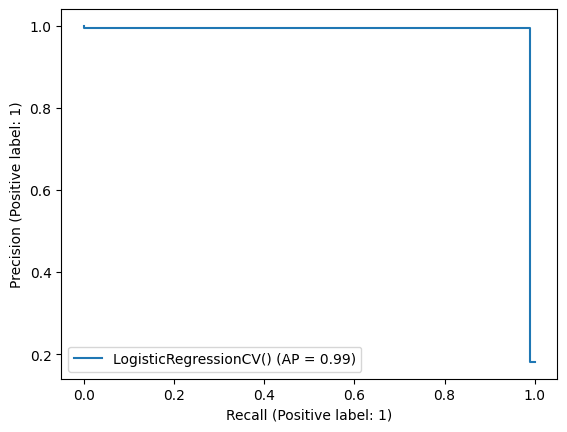

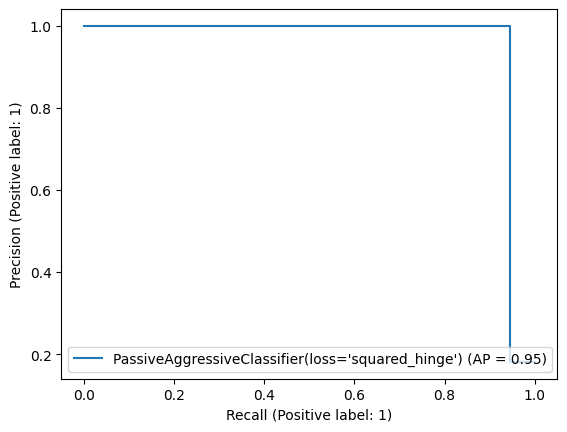

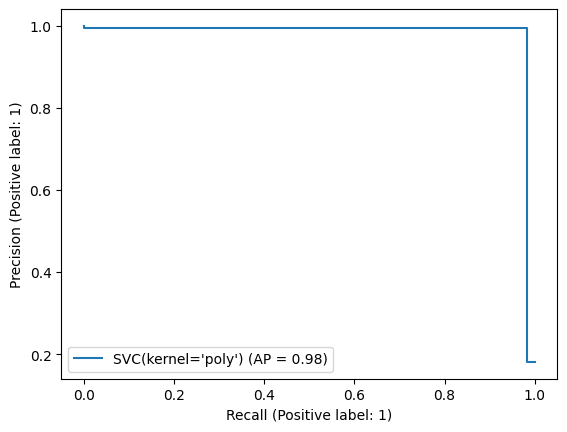

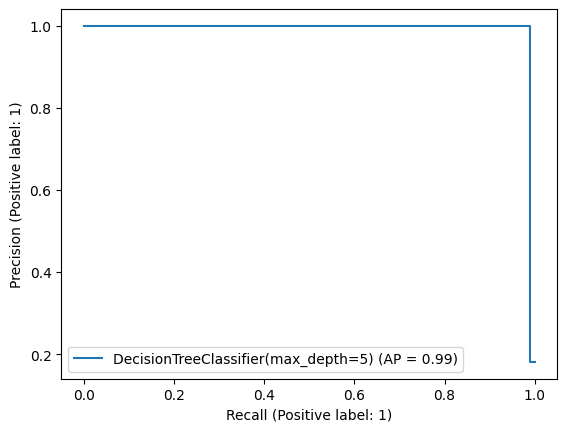

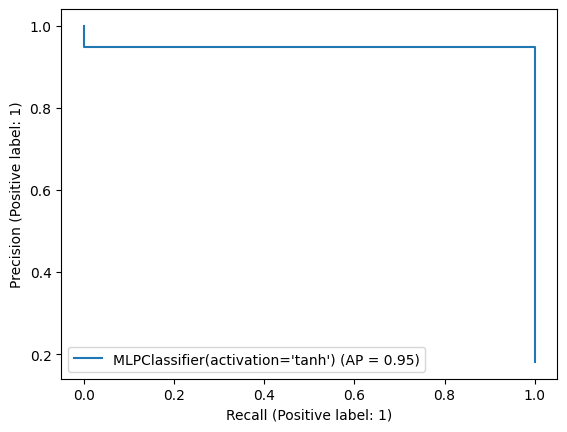

In [7]:

def model_accuracy_estimator(model, scaling_type: str):

    current_X_test = 0
    current_X_train = 0
    if scaling_type == 'std':
        current_X_train = standardized_X_train
        current_X_test = standardized_X_test
    elif scaling_type == 'min-max':
        current_X_train = scaled_X_train
        current_X_test = scaled_X_test
    else:
        raise ValueError('Invalid Scaling Type!')
    
    model.fit(current_X_train, Y_train)
    Y_pred = model.predict(current_X_test)
    accuracy_score = metrics.accuracy_score(Y_test, Y_pred)*100
    print("Accuracy Score for", model, "is", accuracy_score, "%")
    metrics.PrecisionRecallDisplay.from_predictions(Y_test, Y_pred,name=model)
    # return accuracy_score

LogReg_model = linear_model.LogisticRegressionCV()
model_accuracy_estimator(LogReg_model, 'std')

PAClassifier_model = linear_model.PassiveAggressiveClassifier(loss='squared_hinge')
model_accuracy_estimator(PAClassifier_model, 'std')

SVClassifier_model = svm.SVC(kernel='poly', degree=3)
model_accuracy_estimator(SVClassifier_model, 'std')

DecisionTree_model = tree.DecisionTreeClassifier(max_depth=5)
model_accuracy_estimator(DecisionTree_model, 'std')

MLPerceptron_model = neural_network.MLPClassifier(hidden_layer_sizes=(100,), activation='tanh', solver='adam')
model_accuracy_estimator(MLPerceptron_model, 'min-max')

From the above results on accuracy scores for each model, we can make a decision to go forward with either a **LogisticRegression** model with optimized hyperparameters or a **DecisionTree** classifier with max_depth=5 since both models have a high accuracy score and average precision(AP/area under Precision-Recall curve). Here, I have decided to go with the DecisionTree classifier as it has the highest accuracy and average precision compared to the rest of the models.

In [8]:
def Task_3_Solution(customer_id: int, credit_lines_outstanding: int, loan_amt_outstanding: float, total_debt_outstanding: float, income: float, years_employed: int, fico_score: int) -> float:
    features = np.array([credit_lines_outstanding, total_debt_outstanding, years_employed, fico_score])
    features_std = standardizer.transform(features.reshape(1,-1))
    default_pred = DecisionTree_model.predict(features_std)[0]
    expected_loss = loan_amt_outstanding * (1 - 0.10) * default_pred
    return expected_loss

Task_3_Solution(7442532,3,1958.928726,200228.75252,26648.43525,9,900)

/Users/aryasalian/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1763.0358534000002